# Some analysis on the final videos

In [8]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import re

# Plotting style
sns.set_theme(style="whitegrid")
%matplotlib inline

# --- CONFIGURATION ---
# Point this to your "correct_equatorial" folder
DATA_DIR = "/home/phd2/Documenti/embryo/marilena_videos/extracted_equatorial_frames"

In [9]:
data_records = []

print("Scanning directory...")

# Pattern to extract hours from filename: matches "_12.50h.jpg"
time_pattern = re.compile(r"_([0-9]+\.[0-9]+)h\.jpg$")

# Iterate Years
for year in sorted(os.listdir(DATA_DIR)):
    year_path = os.path.join(DATA_DIR, year)
    if not os.path.isdir(year_path): continue
        
    # Iterate Videos
    for video in os.listdir(year_path):
        video_path = os.path.join(year_path, video)
        if not os.path.isdir(video_path): continue
            
        # Iterate Frames
        files = sorted([f for f in os.listdir(video_path) if f.endswith(".jpg")])
        
        for fname in files:
            # Extract time from filename if present
            match = time_pattern.search(fname)
            time_h = float(match.group(1)) if match else 0.0
            
            data_records.append({
                "year": year,
                "video_id": video,
                "filename": fname,
                "time_h": time_h,
                "full_path": os.path.join(video_path, fname)
            })

# Create DataFrame
df = pd.DataFrame(data_records)
print(f"Loaded {len(df)} frames from {df['video_id'].nunique()} videos.")
df.head()

Scanning directory...
Loaded 99458 frames from 251 videos.


,year,video_id,filename,time_h,full_path
0,2016,D2016.11.14_S1895_I106_9,D2016.11.14_S1895_I106_9_10_0_2.25h.jpg,2.25,/home/phd2/Documenti/embryo/marilena_videos/ex...
1,2016,D2016.11.14_S1895_I106_9,D2016.11.14_S1895_I106_9_11_0_2.50h.jpg,2.50,/home/phd2/Documenti/embryo/marilena_videos/ex...
2,2016,D2016.11.14_S1895_I106_9,D2016.11.14_S1895_I106_9_12_0_2.75h.jpg,2.75,/home/phd2/Documenti/embryo/marilena_videos/ex...
3,2016,D2016.11.14_S1895_I106_9,D2016.11.14_S1895_I106_9_13_0_3.00h.jpg,3.00,/home/phd2/Documenti/embryo/marilena_videos/ex...
4,2016,D2016.11.14_S1895_I106_9,D2016.11.14_S1895_I106_9_14_0_3.25h.jpg,3.25,/home/phd2/Documenti/embryo/marilena_videos/ex...


In [10]:
# Group by video to get summary stats
video_stats = df.groupby(['year', 'video_id']).agg(
    num_frames=('filename', 'count'),
    duration_h=('time_h', 'max'),
    start_h=('time_h', 'min') # Should be 0.0 usually
).reset_index()

# Display summary
display(video_stats.describe())

# Top 5 longest videos
print("Longest Videos:")
display(video_stats.sort_values('duration_h', ascending=False).head(5))

,num_frames,duration_h,start_h
count,251.000000,251.000000,251.0
mean,396.247012,83.163227,0.0
std,293.690318,55.078529,0.0
min,72.000000,17.850000,0.0
25%,93.000000,23.010000,0.0
50%,455.000000,113.610000,0.0
75%,636.000000,136.060000,0.0
max,896.000000,160.220000,0.0


Longest Videos:


,year,video_id,num_frames,duration_h,start_h
180,2021,D2021.09.21_S01044_I3026_P_5,896,160.22,0.0
178,2021,D2021.09.21_S01044_I3026_P_3,896,160.22,0.0
177,2021,D2021.09.21_S01044_I3026_P_2,896,160.22,0.0
175,2021,D2021.09.21_S01044_I3026_P_11,896,160.22,0.0
176,2021,D2021.09.21_S01044_I3026_P_12,896,160.22,0.0


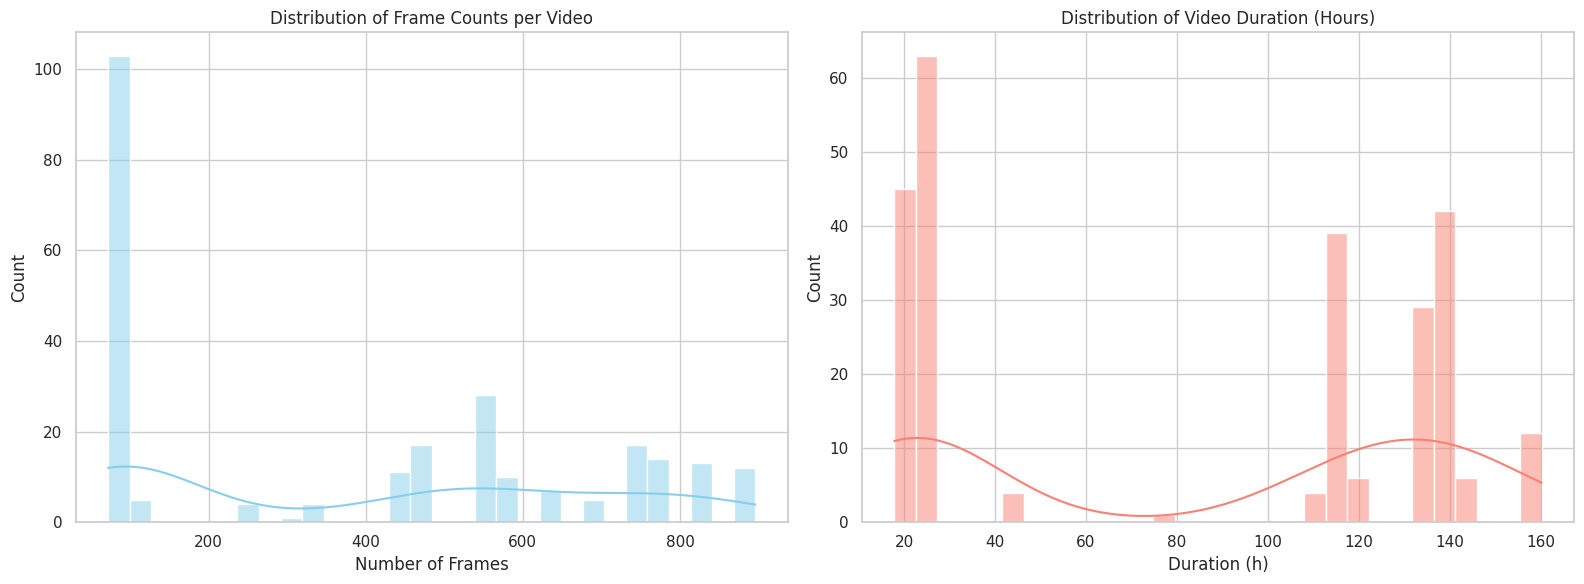

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram: Number of Frames
sns.histplot(data=video_stats, x="num_frames", bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution of Frame Counts per Video")
axes[0].set_xlabel("Number of Frames")

# Histogram: Duration in Hours
sns.histplot(data=video_stats, x="duration_h", bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title("Distribution of Video Duration (Hours)")
axes[1].set_xlabel("Duration (h)")

plt.tight_layout()
plt.show()

Average time between frames: 0.2104 hours (12.62 minutes)
Median time between frames:  0.1900 hours (11.40 minutes)


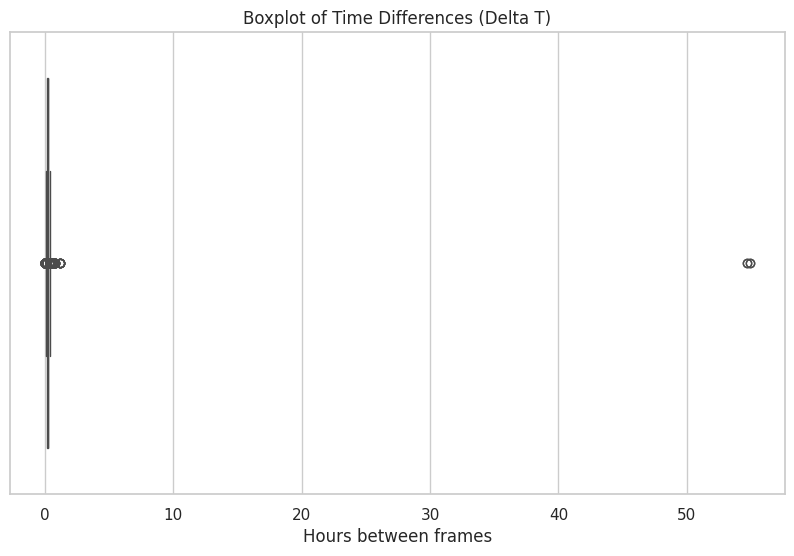

Found 11 instances where gap > 0.99h
Examples of large gaps between frames:


,video_id,time_h,delta_t
74580,D2022.03.04_S01347_I3026_P_4,99.10,54.91
73432,D2022.03.04_S01347_I3026_P_5,99.10,54.91
72937,D2022.03.04_S01347_I3026_P_1,99.10,54.72
74006,D2022.03.04_S01347_I3026_P_2,99.10,54.72
4233,D2017.09.16_S0772_I631_6,94.83,1.14
7180,D2017.09.16_S0772_I631_3,94.83,1.14
6536,D2017.09.16_S0772_I631_7,94.83,1.14
5430,D2017.09.16_S0772_I631_5,94.83,1.14
3589,D2017.09.16_S0772_I631_1,94.82,1.13
4786,D2017.09.16_S0772_I631_2,94.82,1.13


Examples of small gaps between frames:


,video_id,time_h,delta_t
4786,D2017.09.16_S0772_I631_2,94.82,1.13
5983,D2017.09.16_S0772_I631_4,94.82,1.13
3589,D2017.09.16_S0772_I631_1,94.82,1.13
5430,D2017.09.16_S0772_I631_5,94.83,1.14
7180,D2017.09.16_S0772_I631_3,94.83,1.14
6536,D2017.09.16_S0772_I631_7,94.83,1.14
4233,D2017.09.16_S0772_I631_6,94.83,1.14
72937,D2022.03.04_S01347_I3026_P_1,99.10,54.72
74006,D2022.03.04_S01347_I3026_P_2,99.10,54.72
74580,D2022.03.04_S01347_I3026_P_4,99.10,54.91


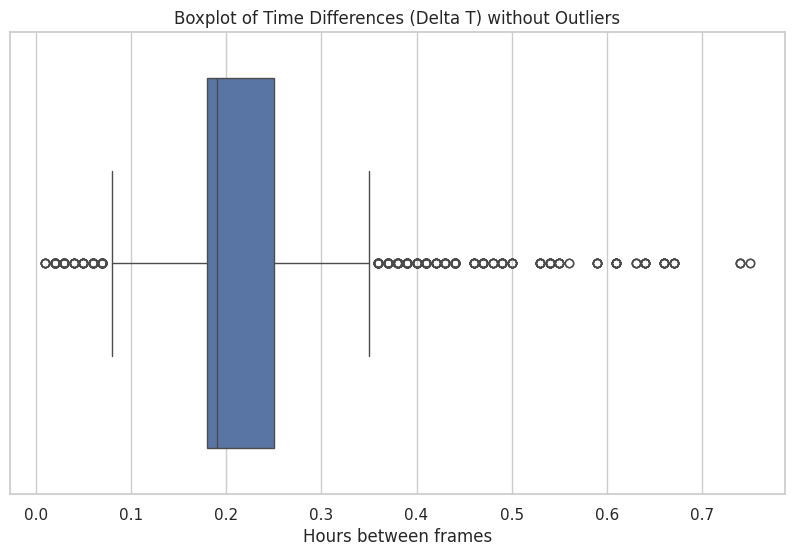

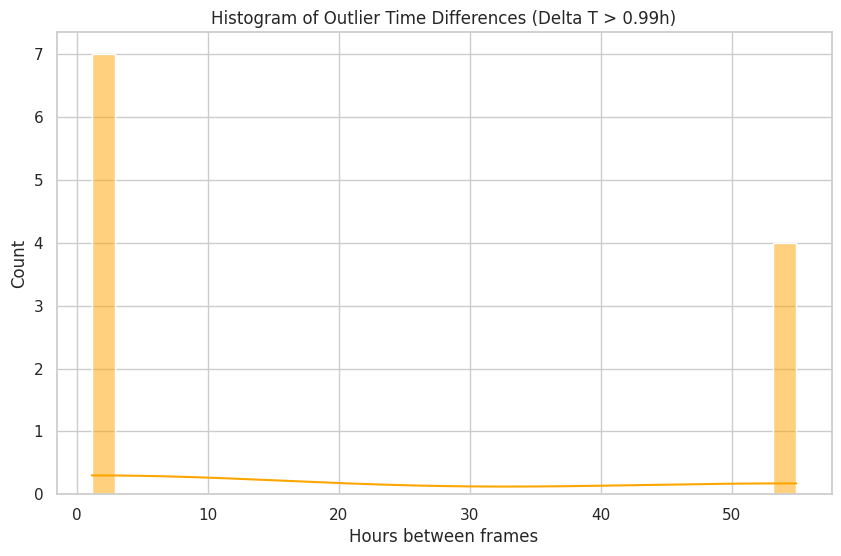

Videos with outliers (gaps > 0.99h):
- D2017.09.16_S0772_I631_2
- D2017.09.16_S0772_I631_4
- D2017.09.16_S0772_I631_1
- D2017.09.16_S0772_I631_5
- D2017.09.16_S0772_I631_3
- D2017.09.16_S0772_I631_7
- D2017.09.16_S0772_I631_6
- D2022.03.04_S01347_I3026_P_1
- D2022.03.04_S01347_I3026_P_2
- D2022.03.04_S01347_I3026_P_4
Videos without outliers:
- D2016.11.14_S1895_I106_6
- D2016.11.14_S1895_I106_7
- D2016.11.14_S1895_I106_8
- D2016.11.14_S1895_I106_9
- D2016.11.15_S0516_I631_1
- D2016.11.15_S0516_I631_2
- D2016.11.15_S0516_I631_3
- D2016.11.15_S0516_I631_4
- D2016.11.15_S1896_I106_6
- D2016.11.15_S1896_I106_7
- D2017.09.15_S0770_I631_1
- D2017.09.15_S0770_I631_2
- D2017.09.15_S0770_I631_3
- D2017.09.15_S0770_I631_4
- D2017.09.15_S0770_I631_5
- D2018.06.11_S01043_I0631_D_10
- D2018.06.11_S01043_I0631_D_7
- D2018.06.11_S01043_I0631_D_8
- D2018.06.11_S01043_I0631_D_9
- D2018.06.12_S01044_I0631_D_1


In [12]:
# Calculate Delta T for every frame within its video group
# We sort by video and time first
df = df.sort_values(['video_id', 'time_h'])
df['delta_t'] = df.groupby('video_id')['time_h'].diff()

# Filter out the first frame of each video (NaN)
delta_t_clean = df['delta_t'].dropna()

# Statistics
mean_dt = delta_t_clean.mean()
median_dt = delta_t_clean.median()
print(f"Average time between frames: {mean_dt:.4f} hours ({mean_dt*60:.2f} minutes)")
print(f"Median time between frames:  {median_dt:.4f} hours ({median_dt*60:.2f} minutes)")

# Visualize Deltas
plt.figure(figsize=(10, 6))
sns.boxplot(x=delta_t_clean)
plt.title("Boxplot of Time Differences (Delta T)")
plt.xlabel("Hours between frames")
plt.show()

# Detect Outliers (Potential missing frames)
threshold = 0.99  # 1 hour threshold
outliers = df[df['delta_t'] > threshold]
print(f"Found {len(outliers)} instances where gap > {threshold:.2f}h")
if not outliers.empty:
    # show some examples, first the longest gaps
    outliers = outliers.sort_values('delta_t', ascending=False)
    print("Examples of large gaps between frames:")
    display(outliers[['video_id', 'time_h', 'delta_t']].head(10))

    # show some examples, first the shortest gaps
    outliers = outliers.sort_values('delta_t', ascending=True)
    print("Examples of small gaps between frames:")
    display(outliers[['video_id', 'time_h', 'delta_t']].head(10))

# revisualize plot without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=delta_t_clean[delta_t_clean <= threshold])
plt.title("Boxplot of Time Differences (Delta T) without Outliers")
plt.xlabel("Hours between frames")
plt.show()

# visualize hist of the outliers
plt.figure(figsize=(10, 6))
sns.histplot(outliers['delta_t'], bins=30, kde=True, color='orange')
plt.title("Histogram of Outlier Time Differences (Delta T > 0.99h)")
plt.xlabel("Hours between frames")
plt.show()

# print some IDs of videos with outliers and some without outliers
videos_with_outliers = outliers['video_id'].unique()
print(f"Videos with outliers (gaps > {threshold:.2f}h):")
for vid in videos_with_outliers[:10]:  # show first 10
    print(f"- {vid}")

videos_without_outliers = df[~df['video_id'].isin(videos_with_outliers)]['video_id'].unique()
print(f"Videos without outliers:")
for vid in videos_without_outliers[:20]:  # show first 10
    print(f"- {vid}")

In [13]:
# --- CONFIGURATION ---
normal_video_id = 'D2016.11.15_S0520_I631_3' 
outlier_video_id = 'D2017.09.16_S0772_I631_1'

In [14]:
from PIL import Image, ImageFile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from skimage.measure import shannon_entropy
from scipy.stats import mannwhitneyu, ks_2samp

# 1. Fix per immagini troncate
ImageFile.LOAD_TRUNCATED_IMAGES = True

# --- FUNZIONI DI SUPPORTO ---

def load_video_volume(video_id, df_meta):
    """
    Carica tutti i frame di un video, li normalizza [0, 1] e li impila in un volume 3D.
    Ritorna: numpy array (Frames, Height, Width)
    """
    # Prendi i frame ordinati temporalmente
    video_frames = df_meta[df_meta['video_id'] == video_id].sort_values('time_h')
    
    volume = []
    
    for _, row in video_frames.iterrows():
        try:
            # Carica in scala di grigi
            img = Image.open(row['full_path']).convert('L')
            img_array = np.array(img).astype(np.float32)
            
            # Normalizzazione Min-Max su singolo frame [0, 1]
            # (Importante per rendere l'entropia comparabile indipendentemente dall'illuminazione)
            norm_img = (img_array - img_array.min()) / (img_array.max() - img_array.min() + 1e-8)
            
            volume.append(norm_img)
        except OSError:
            continue
            
    return np.stack(volume) # Crea il volume 3D (T, H, W)

def calculate_entropy_distribution(volume_3d):
    """
    Calcola l'entropia di Shannon per ogni slice (frame) del volume 3D.
    """
    entropies = []
    for i in range(volume_3d.shape[0]):
        frame = volume_3d[i, :, :]
        # Shannon entropy su immagine normalizzata
        e = shannon_entropy(frame)
        entropies.append(e)
    return np.array(entropies)

# --- ESECUZIONE ---
print("1. Caricamento e Normalizzazione Volumi 3D...")
vol_normal = load_video_volume(normal_video_id, df)
vol_outlier = load_video_volume(outlier_video_id, df)

print(f"   Shape Normale: {vol_normal.shape}")
print(f"   Shape Outlier: {vol_outlier.shape}")

# --- ANALISI 1: ENTROPIA ---
print("\n2. Calcolo Distribuzione Entropia (Frame-by-Frame)...")
entropy_normal = calculate_entropy_distribution(vol_normal)
entropy_outlier = calculate_entropy_distribution(vol_outlier)

# --- ANALISI 2: ISTOGRAMMI PIXEL (VOLUME COMPLETO) ---
print("3. Estrazione Pixel dal Volume 3D...")
# Appiattiamo il volume 3D in un unico array 1D di pixel
pixels_normal = vol_normal.flatten()
pixels_outlier = vol_outlier.flatten()

# Per efficienza nei test statistici e plot, prendiamo un subsample casuale (es. 100.000 pixel)
# Se i video sono grandi, flatten genera array enormi.
rng = np.random.default_rng(42)
sample_size = min(len(pixels_normal), len(pixels_outlier), 100000)
pixels_normal_sub = rng.choice(pixels_normal, sample_size, replace=False)
pixels_outlier_sub = rng.choice(pixels_outlier, sample_size, replace=False)


# --- PLOTTING ---
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot A: Entropia nel Tempo
axes[0,0].plot(entropy_normal, label='Normal (Embryo)', color='green')
axes[0,0].plot(entropy_outlier, label='Outlier (Empty?)', color='red', linestyle='--')
axes[0,0].set_title("Andamento Entropia nel Tempo")
axes[0,0].set_xlabel("Frame Index")
axes[0,0].set_ylabel("Shannon Entropy")
axes[0,0].legend()

# Plot B: Distribuzione Entropia (KDE)
sns.kdeplot(entropy_normal, fill=True, color='green', label='Normal', ax=axes[0,1])
sns.kdeplot(entropy_outlier, fill=True, color='red', label='Outlier', ax=axes[0,1])
axes[0,1].set_title("Densità di Probabilità dell'Entropia")
axes[0,1].set_xlabel("Entropy Value")
axes[0,1].legend()

# Plot C: Istogrammi Intensità Pixel (Volume 3D)
sns.histplot(pixels_normal_sub, bins=50, color='green', alpha=0.5, label='Normal', stat="density", ax=axes[1,0])
sns.histplot(pixels_outlier_sub, bins=50, color='red', alpha=0.5, label='Outlier', stat="density", ax=axes[1,0])
axes[1,0].set_title("Distribuzione Intensità Pixel (Volume 3D)")
axes[1,0].set_xlabel("Normalized Intensity [0-1]")
axes[1,0].legend()

# Plot D: Cumulative Distribution Function (CDF) dei Pixel
sns.ecdfplot(pixels_normal_sub, color='green', label='Normal', ax=axes[1,1])
sns.ecdfplot(pixels_outlier_sub, color='red', label='Outlier', ax=axes[1,1])
axes[1,1].set_title("CDF Intensità Pixel")
axes[1,1].legend()

plt.tight_layout()
plt.show()


# --- TEST STATISTICI ---
print("\n" + "="*50)
print("RISULTATI TEST STATISTICI")
print("="*50)

# 1. Test sull'Entropia (Mann-Whitney U)
# Usiamo Mann-Whitney perché le distribuzioni di entropia potrebbero non essere Gaussiane
stat_ent, p_ent = mannwhitneyu(entropy_normal, entropy_outlier, alternative='two-sided')
print(f"\n[ENTROPIA] Mann-Whitney U Test:")
print(f"  Statistic={stat_ent:.2f}, p-value={p_ent:.4e}")
if p_ent < 0.05:
    print("  >> Le distribuzioni di entropia sono STATISTICAMENTE DIVERSE.")
else:
    print("  >> Nessuna differenza significativa nell'entropia.")

# 2. Test sui Pixel (Kolmogorov-Smirnov)
# Confronta se i due campioni di pixel provengono dalla stessa distribuzione continua
stat_ks, p_ks = ks_2samp(pixels_normal_sub, pixels_outlier_sub)
print(f"\n[PIXEL HISTOGRAM] Kolmogorov-Smirnov Test:")
print(f"  Statistic={stat_ks:.4f}, p-value={p_ks:.4e}")
if p_ks < 0.05:
    print("  >> Le distribuzioni dei pixel (istogrammi) sono STATISTICAMENTE DIVERSE.")
else:
    print("  >> Nessuna differenza significativa nei pixel.")

# --- DIAGNOSI AUTOMATICA ---
print("\n" + "-"*30)
mean_ent_norm = np.mean(entropy_normal)
mean_ent_out = np.mean(entropy_outlier)

print(f"Media Entropia (Normal):  {mean_ent_norm:.3f}")
print(f"Media Entropia (Outlier): {mean_ent_out:.3f}")

if mean_ent_out < mean_ent_norm * 0.8: # Threshold empirico (es. 20% in meno)
    print("\nDIAGNOSI: L'Outlier ha un'entropia significativamente più bassa.")
    print("          È molto probabile che sia un POZZETTO VUOTO (Empty Well).")
elif p_ent < 0.05 and mean_ent_out > mean_ent_norm:
    print("\nDIAGNOSI: L'Outlier ha entropia diversa ma alta.")
    print("          Potrebbe contenere detriti o artefatti, non necessariamente vuoto.")

1. Caricamento e Normalizzazione Volumi 3D...


ValueError: need at least one array to stack